___

<a href='https://www.udemy.com/user/joseportilla/'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Decision Trees

## The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.


<img src="penguin.jpg" style="max-width:400px">

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

## Imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [7]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [8]:
df["sex"].isna().sum()

10

In [9]:
df[df["sex"]=="."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [10]:
df["sex"].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [11]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## EDA

### Missing Data

Recall the purpose is to create a model for future use, so data points missing crucial information won't help in this task, especially since for future data points we will assume the research will grab the relevant feature information.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [14]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [15]:
df[df["species"]=="Gentoo"].groupby("sex").describe()

culmen_length_mm                                                        \
                  count       mean       std   min    25%   50%     75%   max   
sex                                                                             
.                   1.0  44.500000       NaN  44.5  44.50  44.5  44.500  44.5   
FEMALE             58.0  45.563793  2.051247  40.9  43.85  45.5  46.875  50.5   
MALE               61.0  49.473770  2.720594  44.4  48.10  49.5  50.500  59.6   

       culmen_depth_mm             ... flipper_length_mm        body_mass_g  \
                 count       mean  ...               75%    max       count   
sex                                ...                                        
.                  1.0  15.700000  ...             217.0  217.0         1.0   
FEMALE            58.0  14.237931  ...             215.0  222.0        58.0   
MALE              61.0  15.718033  ...             225.0  231.0        61.0   

                                                                         
               mean         std     min     25%     50%     75%     max  
sex                                                                      
.       4875.000000         NaN  4875.0  4875.0  4875.0  4875.0  4875.0  
FEMALE  4679.741379  281.578294  3950.0  4462.5  4700.0  4875.0  5200.0  
MALE    5484.836066  313.158596  4750.0  5300.0  5500.0  5700.0  6300.0  

[3 rows x 32 columns]

In [16]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [17]:
df[df["species"]=="Gentoo"].dropna()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [18]:
df.shape

(344, 7)

In [19]:
df[df["sex"]=="MALE"].shape

(168, 7)

In [20]:
df[df["sex"]=="FEMALE"].shape

(165, 7)

In [21]:
df[df["species"]=="Gentoo"].groupby("sex").describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [22]:
# What percentage are we dropping?
100*(10/344)

2.9069767441860463

In [23]:
df = df.dropna()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [25]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [49]:
df.at[df[df["sex"]=="."].index[0], "sex"] = "FEMALE"

In [69]:
df.loc[336, "sex"]

'FEMALE'

In [51]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [53]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

## Visualization

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

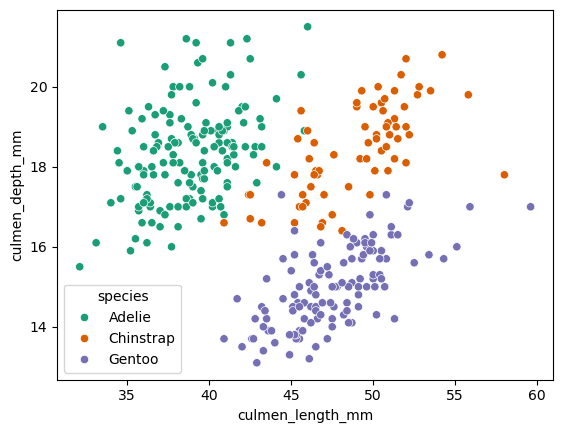

In [71]:
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue='species', palette='Dark2')

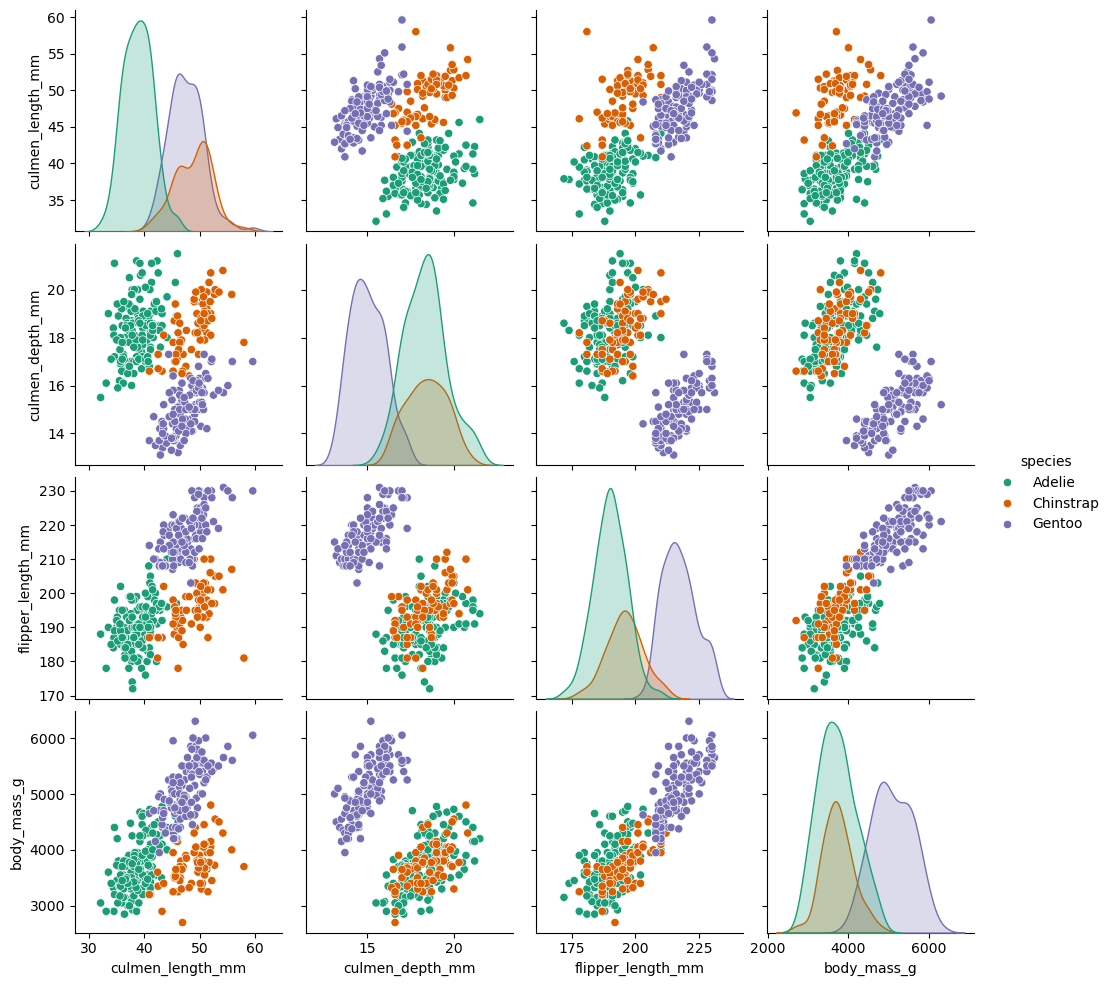

In [75]:
sns.pairplot(data=df,hue='species',palette='Dark2')

C:\Users\rd\AppData\Local\Temp\ipykernel_3040\1326606371.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='species', y='culmen_length_mm', kind='box', col='sex', palette='Dark2')


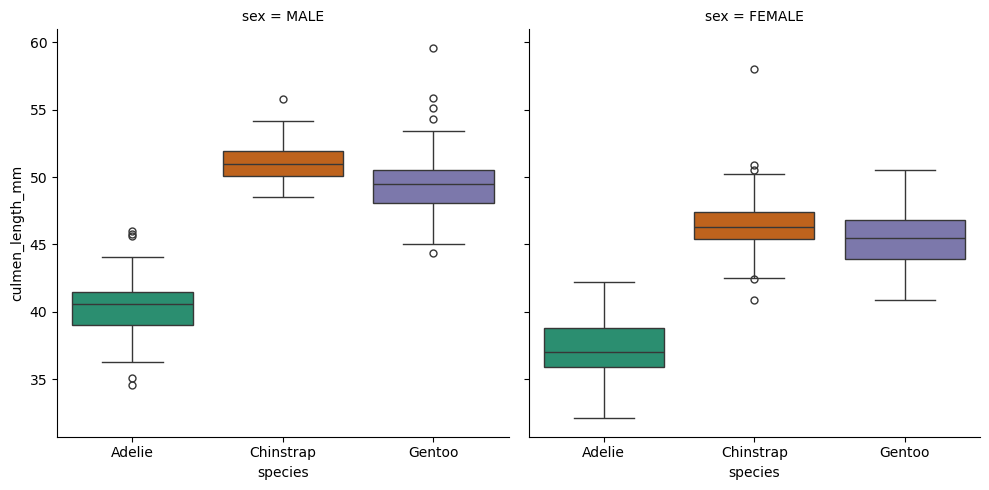

In [77]:
sns.catplot(data=df, x='species', y='culmen_length_mm', kind='box', col='sex', palette='Dark2')

## Feature Engineering

In [79]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,True,True,False,False,True,False
340,46.8,14.3,215.0,4850.0,False,False,True,True,False,False,True,False
341,50.4,15.7,222.0,5750.0,False,False,True,True,False,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,True,True,False,False,True,False


In [81]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,False


## Train | Test Split

In [83]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [85]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Decision Tree Classifier

## Default Hyperparameters

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
model = DecisionTreeClassifier()

In [131]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [133]:
base_pred = model.predict(X_test)

## Evaluation

In [117]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [113]:
y_test.shape

(101,)

In [115]:
y_test.unique()

array(['Chinstrap', 'Gentoo', 'Adelie'], dtype=object)

In [137]:
Confu_matr = confusion_matrix(y_test, base_pred, labels=model.classes_)
Confu_matr

array([[41,  0,  0],
       [ 2, 21,  0],
       [ 0,  0, 37]], dtype=int64)

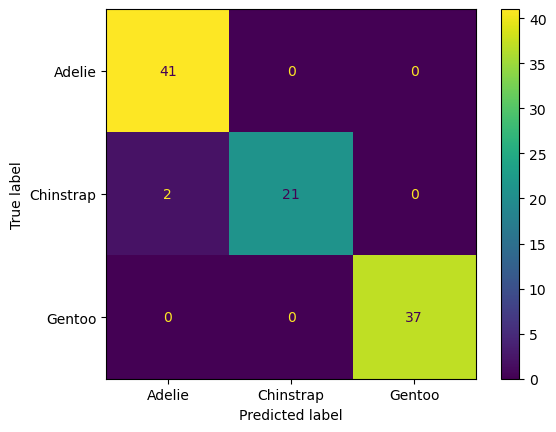

In [155]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, labels=model.classes_)

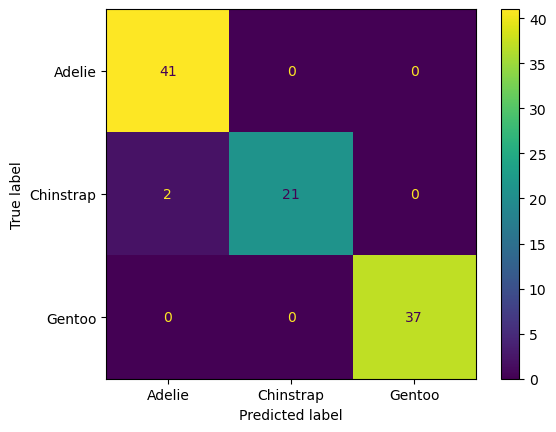

In [165]:
displ = ConfusionMatrixDisplay(confusion_matrix=Confu_matr,display_labels=model.classes_)
displ.plot()
#plt.show()

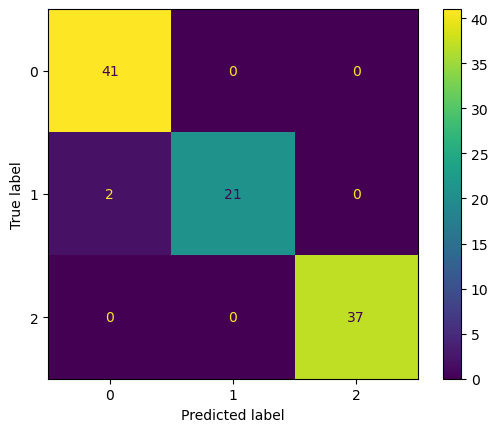

In [149]:
#displ = ConfusionMatrixDisplay(confusion_matrix=Confu_matr,display_labels=model.classes_)
displ = ConfusionMatrixDisplay(confusion_matrix=Confu_matr)
displ.plot()

In [157]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.91      0.95        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.97      0.98       101
weighted avg       0.98      0.98      0.98       101



In [171]:
model.feature_importances_

array([0.34772106, 0.04203954, 0.542054  , 0.        , 0.0681854 ,
       0.        , 0.        ])

In [173]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [181]:
Feature_Importance = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])
Feature_Importance

,Feature Importance
culmen_length_mm,0.347721
culmen_depth_mm,0.042040
flipper_length_mm,0.542054
body_mass_g,0.000000
island_Dream,0.068185
island_Torgersen,0.000000
sex_MALE,0.000000


In [185]:
Feature_Importance.sort_values(by="Feature Importance")
#flipper_length_mm	0.542054

,Feature Importance
body_mass_g,0.000000
island_Torgersen,0.000000
sex_MALE,0.000000
culmen_depth_mm,0.042040
island_Dream,0.068185
culmen_length_mm,0.347721
flipper_length_mm,0.542054


<Axes: xlabel='species', ylabel='body_mass_g'>

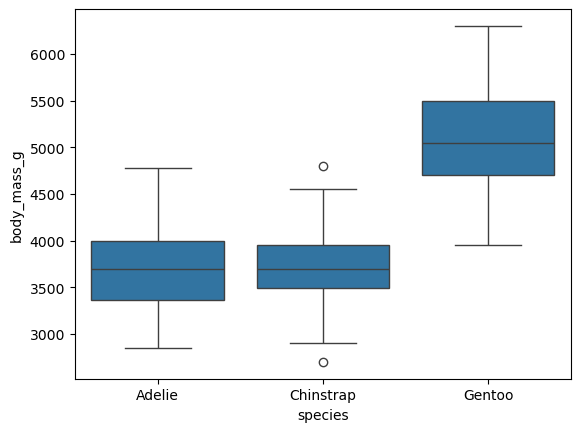

In [179]:
sns.boxplot(data=df, x='species', y='body_mass_g')

## Visualize the Tree

This function is fairly new, you may want to review the online docs:

Online Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [187]:
from sklearn.tree import plot_tree

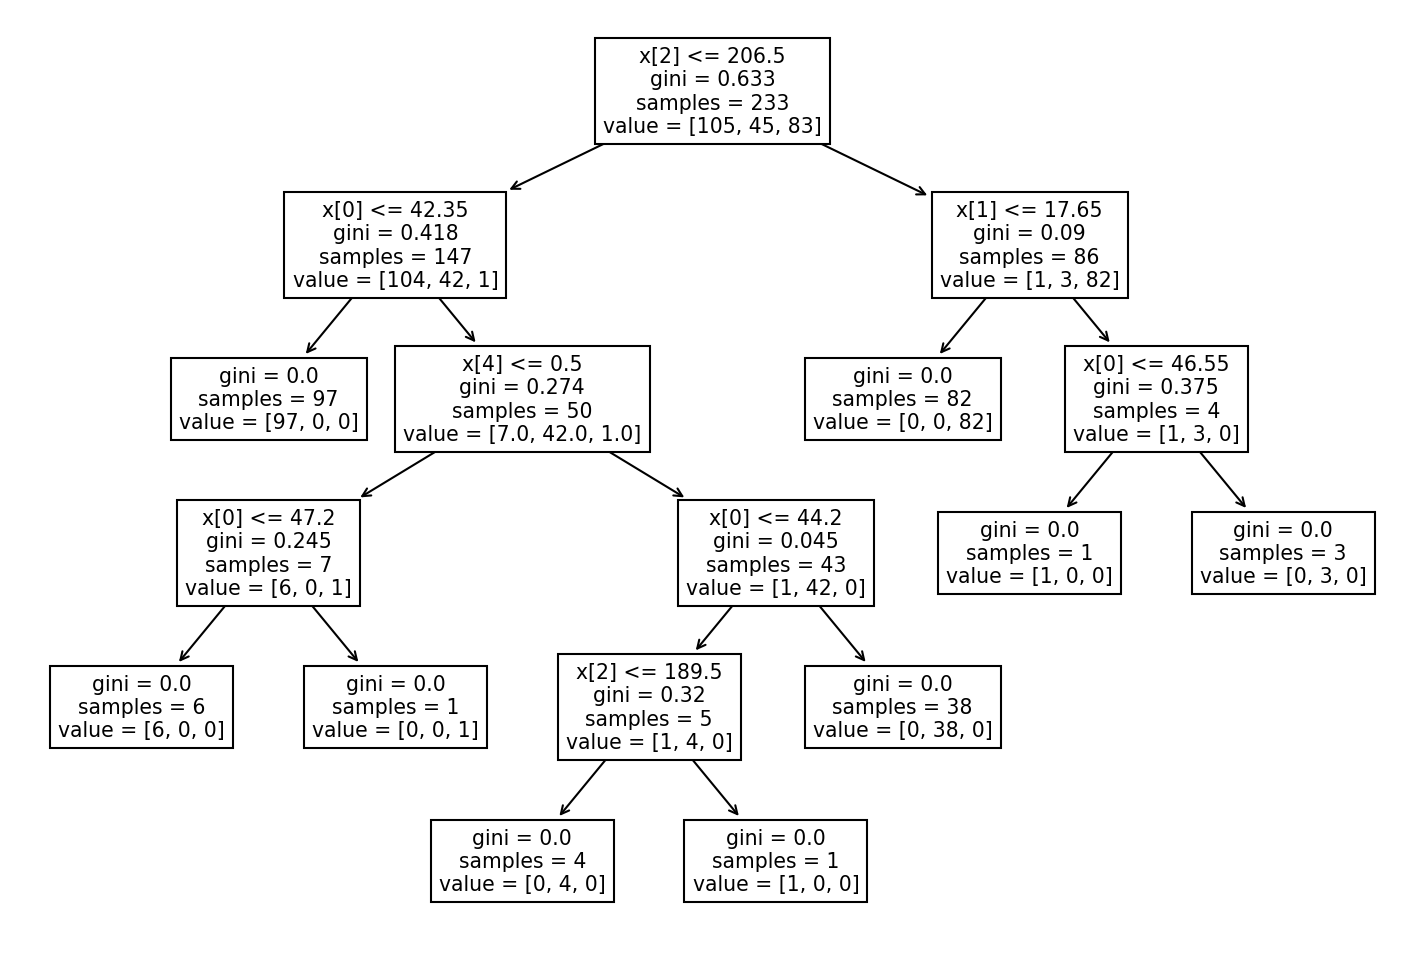

In [191]:
plt.figure(figsize=(12,8), dpi=150)
plot_tree(model);

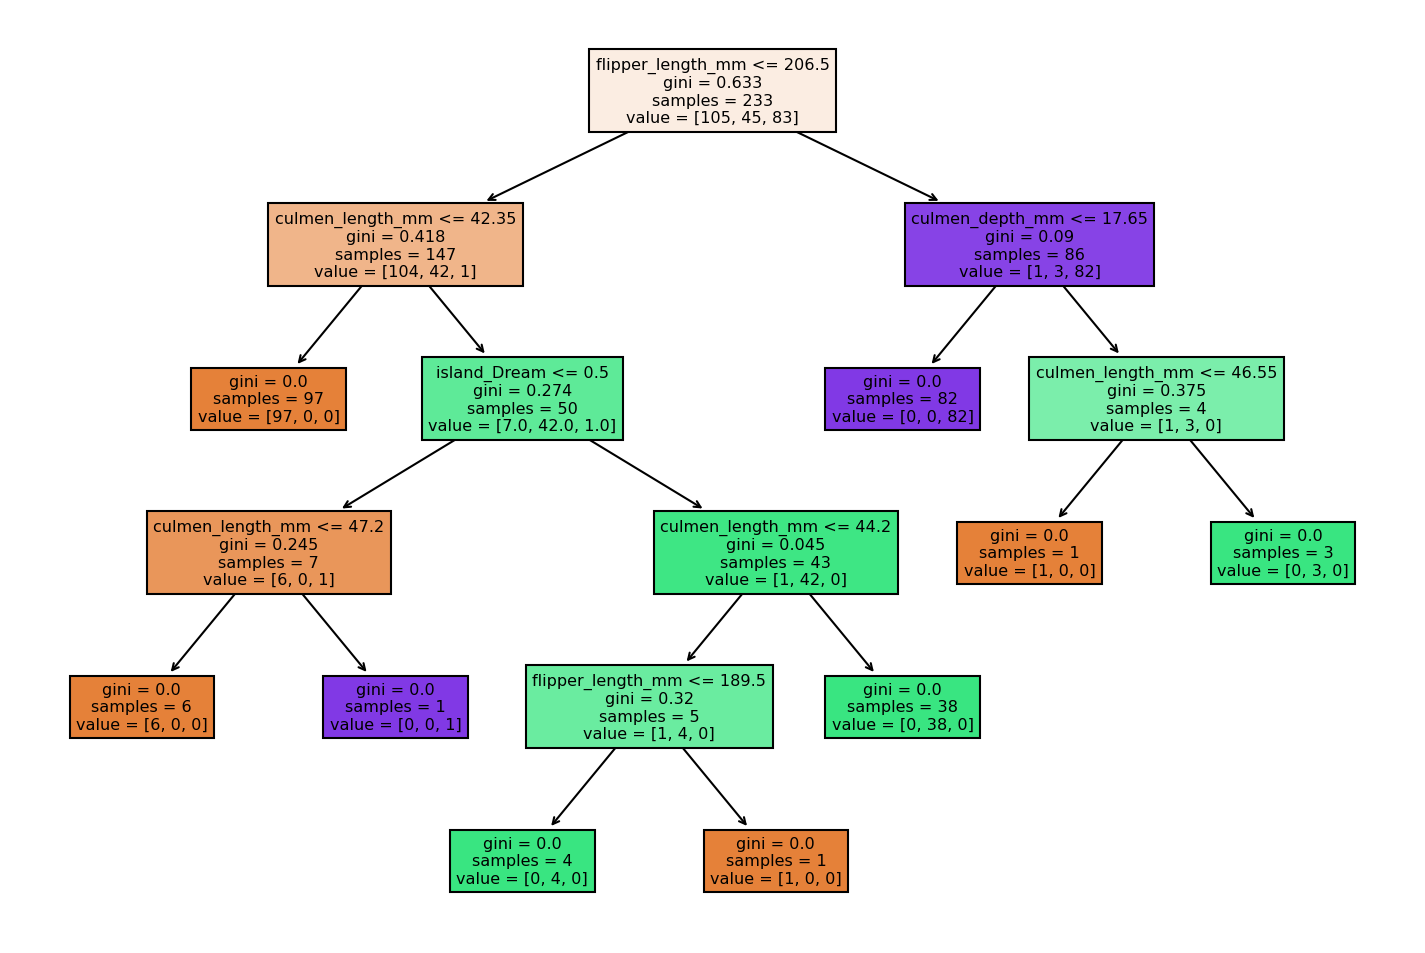

In [193]:
plt.figure(figsize=(12,8), dpi=150)
plot_tree(model, filled=True, feature_names=X.columns);

## Reporting Model Results

To begin experimenting with hyperparameters, let's create a function that reports back classification results and plots out the tree.

In [195]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

## Understanding Hyperparameters

### Max Depth

In [197]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strat

In [199]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





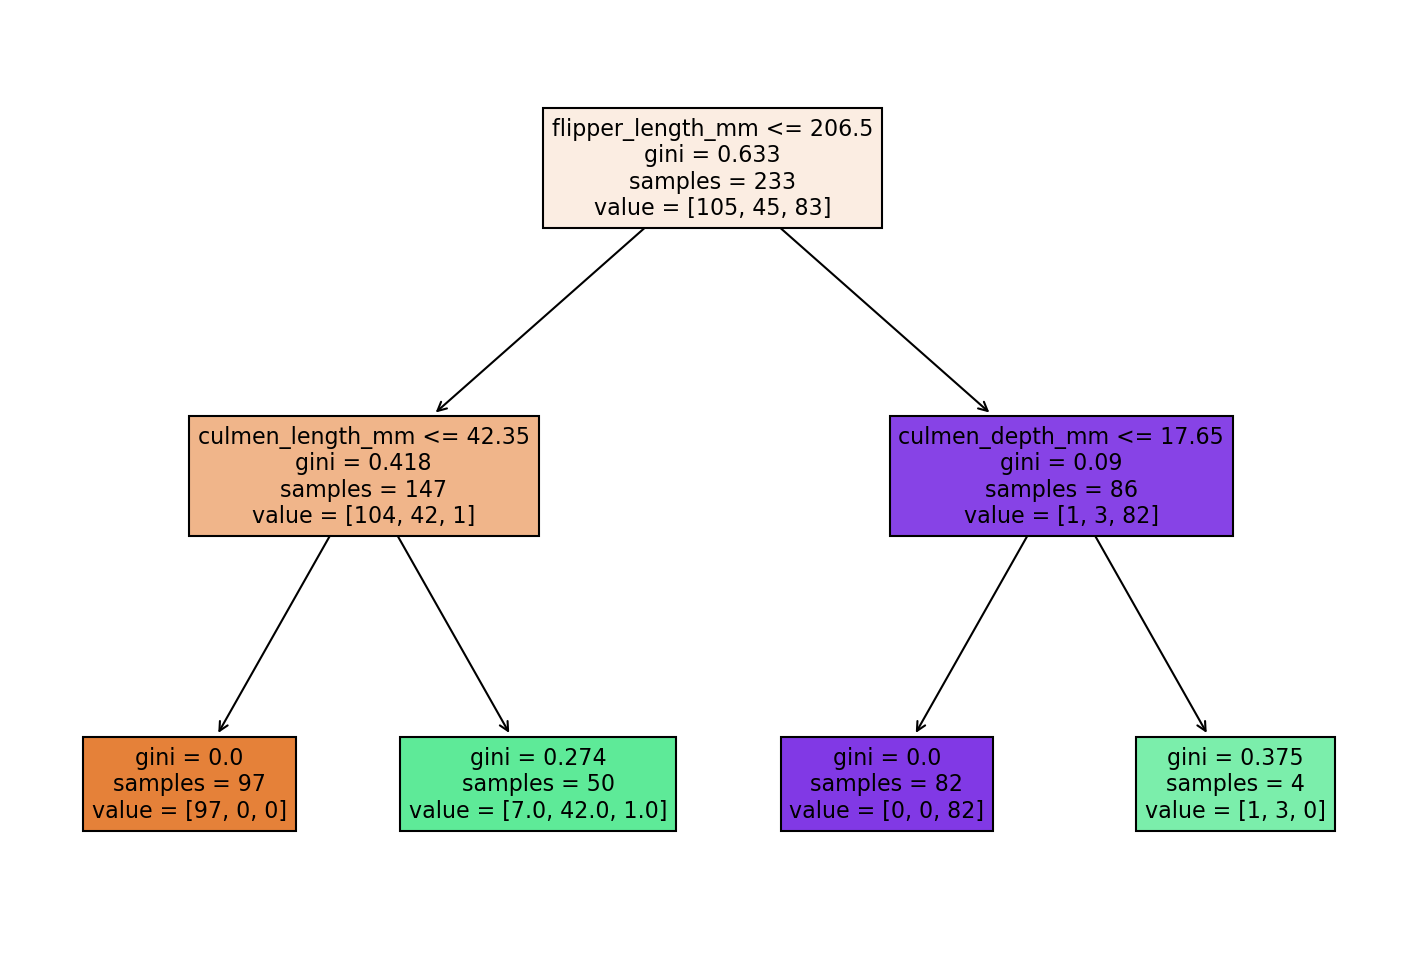

In [201]:
report_model(pruned_tree)

## Max Leaf Nodes

In [203]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





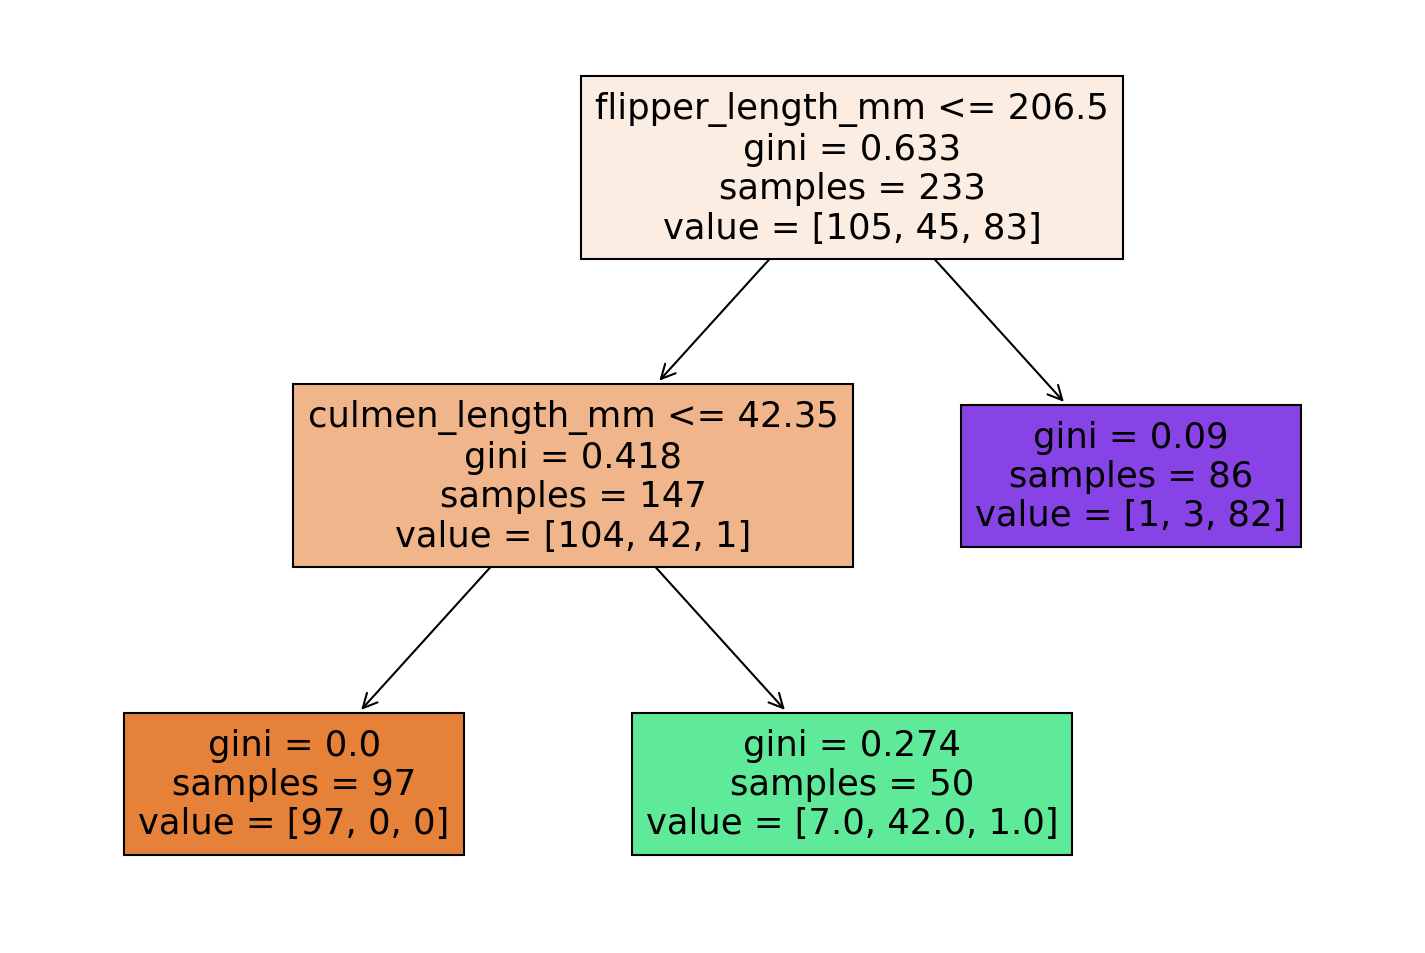

In [205]:
report_model(pruned_tree)

## Criterion

In [207]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101





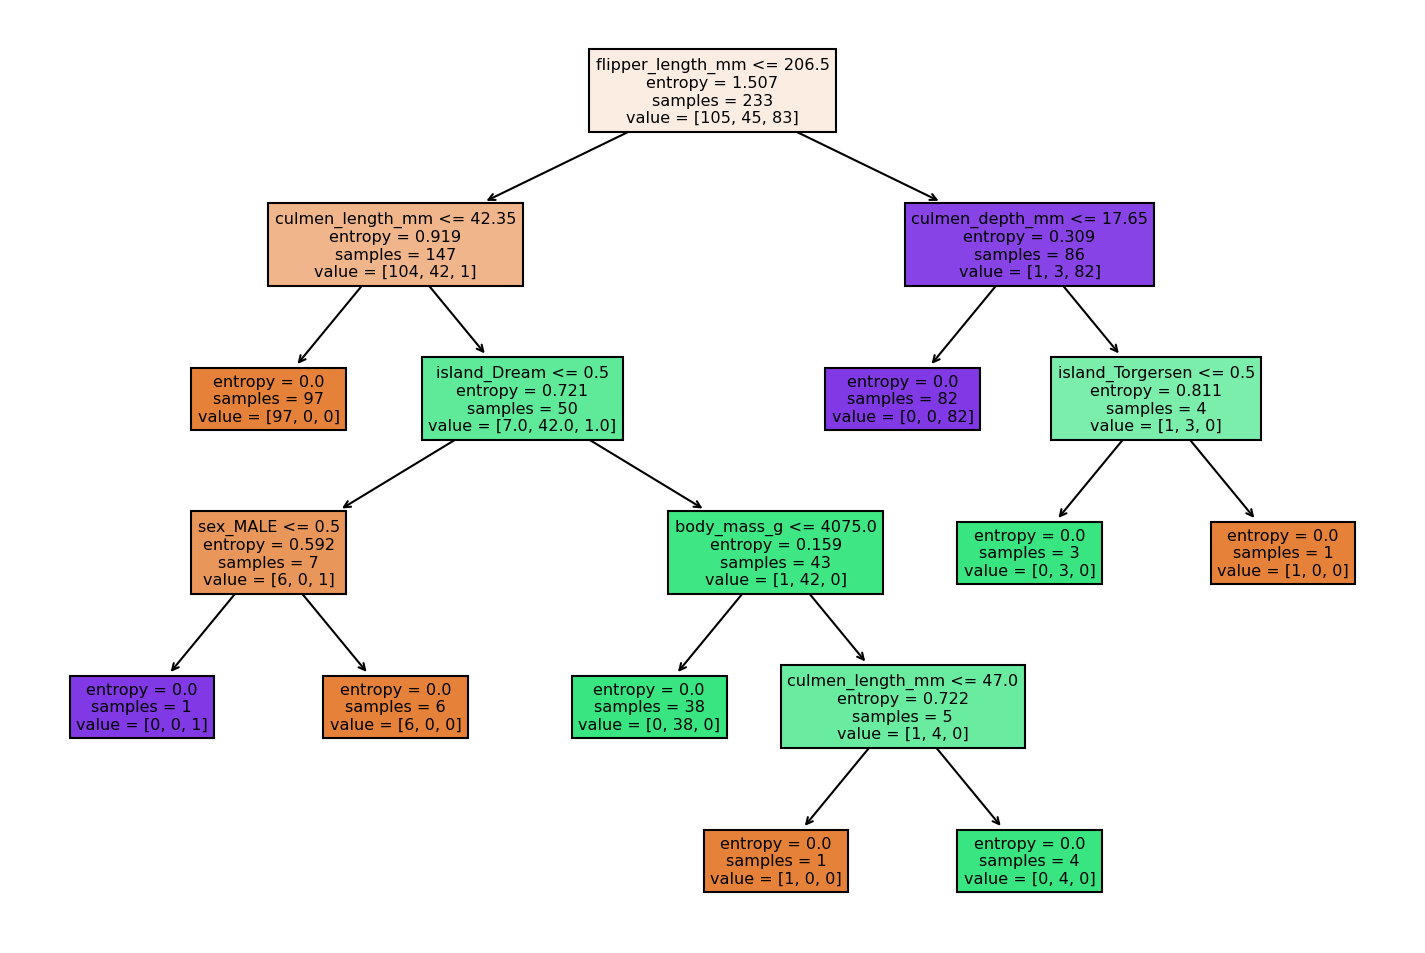

In [209]:
report_model(entropy_tree)

---